# Count violations

Show the violations of a spec. Use this to investigate the features we use for learning of a visualization.

In [8]:
from draco.spec import Data, Task, Query
from draco.learn.helper import count_violations, compute_cost
import pandas as pd
from vega3 import VegaLite
from pprint import pprint

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARN)

In [9]:
true = True
false = False

In [10]:
data_url = '../data/cars.json'
data = Data.from_json(data_url)

spec1 = {
  "mark": "tick",
  "encoding": {
    "y": {
      "scale": {
        "zero": false
      },
      "field": "Horsepower",
      "type": "quantitative",
      "bin": {
        "maxbins": 10
      }
    },
    "x": {
      "scale": {
        "zero": true
      },
      "field": "Acceleration",
      "type": "quantitative"
    }
  },
  "data": {
    "url": "data/cars.json",
    "format": {
      "type": "json"
    }
  },
  "$schema": "https://vega.github.io/schema/vega-lite/v2.0.json"
}
spec2 = {
  "data": {
    "url": "data/cars.json",
    "format": {
      "type": "json"
    }
  },
  "mark": "point",
  "encoding": {
    "x": {
      "field": "Horsepower",
      "type": "quantitative",
      "scale": {}
    },
    "y": {
      "field": "Acceleration",
      "type": "quantitative",
      "scale": {}
    }
  },
  "config": {
    "overlay": {
      "line": true
    },
    "scale": {
      "useUnaggregatedDomain": true
    }
  }
}

In [11]:
values = pd.DataFrame(data.content)

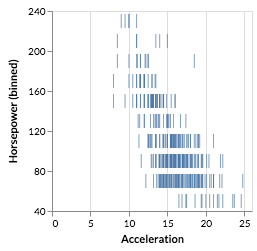

In [12]:
VegaLite(spec1, values)

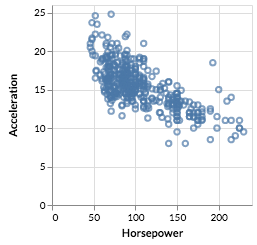

In [13]:
VegaLite(spec2, values)

In [14]:
def print_violations(spec):
    task = Task(data, Query.from_vegalite(spec))
    violations = count_violations(task)
    print(compute_cost(violations))
    pprint(violations)
    print()
    
print('First:')
print_violations(spec1)

print('Second:')
print_violations(spec2)

First:
12
defaultdict(<class 'int'>,
            {'bin': 1,
             'c_d_tick': 1,
             'continuous_x': 1,
             'encoding': 2,
             'encoding_field': 2,
             'ordered_y': 1,
             'orientation_binned': 1,
             'type_q': 2})

Second:
12
defaultdict(<class 'int'>,
            {'c_c_point': 1,
             'continuous_x': 1,
             'continuous_y': 1,
             'encoding': 2,
             'encoding_field': 2,
             'type_q': 2})

